In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
os.chdir('/home')

# Any results you write to the current directory are saved as output.


In [2]:
#Loading libraries & datasets
import tensorflow as tf
import numpy as np
from IPython.display import YouTubeVideo

video_lvl_record = "data/full/video/train2072.tfrecord"
frame_lvl_record = "data/full/frame/train2072.tfrecord"

In [25]:
for i, example in enumerate(tf.python_io.tf_record_iterator(frame_lvl_record)):
    tf_example = tf.train.Example.FromString(example)
    print(list(tf_example.features.feature['id']))
    
    if i > -1:
        break

TypeError: 'Feature' object is not iterable

In [26]:
tf_example

features {
  feature {
    key: "id"
    value {
      bytes_list {
        value: "SzHA"
      }
    }
  }
  feature {
    key: "labels"
    value {
      int64_list {
        value: 4
        value: 9
        value: 10
        value: 34
        value: 37
      }
    }
  }
}

In [3]:
vid_ids = []
labels = []
mean_rgb = []
mean_audio = []

for example in tf.python_io.tf_record_iterator(video_lvl_record):
    tf_example = tf.train.Example.FromString(example)

    vid_ids.append(tf_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
    labels.append(tf_example.features.feature['labels'].int64_list.value)
    mean_rgb.append(tf_example.features.feature['mean_rgb'].float_list.value)
    mean_audio.append(tf_example.features.feature['mean_audio'].float_list.value)

In [29]:
tf.train.SequenceExample.FromString(example).feature_lists.feature_list['rgb'].feature

[bytes_list {
  value: "\000@W(\000\034\202,^Y\304?xd\322\241\210\000B\226]\\\\\224#l\217\202m\307\222r\\E{&\213Kn\254e\244\\8\246aW?YzX,\214\240\316\220\220\200\000\260\243\267\217\232\216\224\211\311\206_m\244z\247\2245\213Izs\217\233\317r\271\247e\205\313\243\221\273~`u\227\203\234oWk4\220\201\226\216Z\243O~b?\217\254\234\326zl\262\217\323\207=rN\263\213gF\221hy\212+~y\230]6v\230\377~\342\207r\233\254\341\360VBE\213\024\270\315cM&\376\273\205\021X\254pe]bTv\232\232\316Yo\216vR\307\254.)\261\263\270\202h\264x\215\213;\262tV\270v\221\200\245uNj\177yK\322\210\250\222\340ji\220\262\267\210hc\246o\267\260n\302\234\251^rnv\276ngWz\262\253\307qS\213\221P\207+T\203tNrk\210u\231\210\266\312\223u\203\3011\244\216\222Nl\212x\207@\231W8\251Y\226v\177x\361\221\203B\223*\331{ZW\225\227\\K\320\211\2136UPr\237dp2\217\242E}\340vg\242v\245\\\216h\221\220]7\227\253\200\203\217]N\277E\236}<H\223X\212\211\343h|rDwEHzm\216\231X\223vQJG\324\255?ybufjx\303\245\241lJgnK\211l\247\000F7\213FV\213z\265\221\242

In [12]:
list(tf_example.features.feature.keys())

['id', 'mean_rgb', 'labels', 'mean_audio']

In [17]:
type(tf_example.features.feature['mean_audio'])

tensorflow.core.example.feature_pb2.Feature

In [10]:
max(map(max, labels))

3756

In [5]:
print('Number of videos in this tfrecord: ',len(mean_rgb))
print('Picking a youtube video id:',vid_ids[13])
print('First 20 features of a youtube video (',vid_ids[13],'):')
print(mean_rgb[13][:20])

Number of videos in this tfrecord:  977
Picking a youtube video id: C8HA
First 20 features of a youtube video ( C8HA ):
[0.537328839302063, 0.09894975274801254, 1.6871850490570068, 0.1870020478963852, 0.0548713244497776, -0.3643704950809479, 0.11928962171077728, -0.2632986009120941, 0.8155510425567627, 0.8471850752830505, -0.8149848580360413, 0.5752896070480347, 0.3801000714302063, -0.7488411068916321, 0.07348570227622986, 0.2483876645565033, -1.0287888050079346, -0.42565155029296875, 0.14945955574512482, -0.20442278683185577]


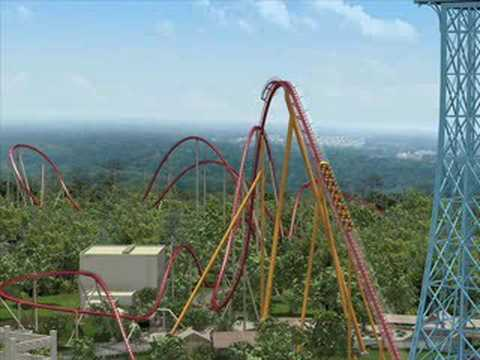

In [6]:
#With that video id, we can play the video
YouTubeVideo('-QM5ooctj0w')

In [7]:
# due to execution time, we're only going to read the first video


for example in tf.python_io.tf_record_iterator(frame_lvl_record):        
    tf_seq_example = tf.train.SequenceExample.FromString(example)
    n_frames = len(tf_seq_example.feature_lists.feature_list['audio'].feature)
    sess = tf.InteractiveSession()
    rgb_frame = []
    audio_frame = []
    # iterate through frames
    for i in range(n_frames):
        rgb_frame.append(tf.cast(tf.decode_raw(
                tf_seq_example.feature_lists.feature_list['rgb'].feature[i].bytes_list.value[0],tf.uint8)
                       ,tf.float32).eval())
        audio_frame.append(tf.cast(tf.decode_raw(
                tf_seq_example.feature_lists.feature_list['audio'].feature[i].bytes_list.value[0],tf.uint8)
oS                       ,tf.float32).eval())
        
        
    sess.close()
    feat_rgb.append(rgb_frame)
    feat_audio.append(audio_frame)
    break

In [8]:
print('The first video has %d frames' %len(feat_rgb[0]))

The first video has 149 frames


In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np

In [10]:
n=10
from collections import Counter
label_mapping = pd.read_csv('../data/label_names_2018.csv',header=0,index_col=0,squeeze=True).T.to_dict()

top_n = Counter([item for sublist in labels for item in sublist]).most_common(n)
top_n_labels = [int(i[0]) for i in top_n]
top_n_label_names = [label_mapping[x] for x in top_n_labels]
top_n_label_names

['Game',
 'Vehicle',
 'Concert',
 'Video game',
 'Car',
 'Animation',
 'Dance',
 'Association football',
 'Musician',
 'Food']

In [19]:
labels[2]

[2, 56, 75, 1907]

In [22]:
G.edges

EdgeView([('Concert', 'Animation'), ('Concert', 'Car'), ('Concert', 'Association football'), ('Animation', 'Association football'), ('Animation', 'Car'), ('Game', 'Vehicle'), ('Game', 'Food'), ('Game', 'Dance'), ('Vehicle', 'Dance'), ('Video game', 'Musician')])

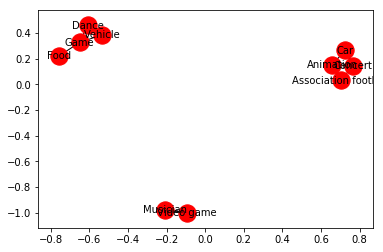

In [11]:
import networkx as nx
from itertools import combinations

G=nx.Graph()

G.clear()
for list_of_nodes in labels:
    filtered_nodes = set(list_of_nodes).intersection(set(top_n_labels))  
    for node1,node2 in list(combinations(filtered_nodes,2)): 
        node1_name = label_mapping[node1]
        node2_name = label_mapping[node2]
        G.add_node(node1_name)
        G.add_node(node2_name)
        G.add_edge(node1_name, node2_name)

nx.draw_networkx(G,font_size="10")

In [ ]:
colors = plt.cm.rainbow(np.linspace(0, 1, n))
mean_rgb_top_n = []
labels_for_tsne = []
# filtering mean_rgb so it only contains top n labels
for idx, list_of_nodes in enumerate(labels):
    for node in list_of_nodes:
        if node in top_n_labels:
            mean_rgb_top_n.append(mean_rgb[idx])
            labels_for_tsne.append(node)


X_embedded = TSNE(n_components=2, random_state=0).fit_transform(mean_rgb_top_n) 


fig = plt.figure()
ax = fig.add_subplot(111)

handles = []
for indx, color in enumerate(colors):
    this_label = top_n_labels[indx]
    X_embedded_filtered = X_embedded[np.array([x==this_label for x in labels_for_tsne])]
    handles.append(ax.scatter(X_embedded_filtered[:, 0], X_embedded_filtered[:, 1], c=color, marker="o",edgecolor='none'))

ax.legend(handles, top_n_labels)

plt.show()